In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak
import json
import os
import time
from datetime import datetime
from matplotlib import pyplot
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TensorFlow.")

import tensorflow as tf
print("\nTensorFlow version: ", tf.__version__)
print("\nIs GPU available?", tf.test.is_gpu_available())
print("\nNum GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("\nPhysical Devices: ", tf.config.list_physical_devices('GPU'))

from tensorflow.python.client import device_lib
print("\nLocal devices:", device_lib.list_local_devices())

Please install GPU version of TensorFlow.

TensorFlow version:  2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

Is GPU available? False

Num GPUs Available:  0

Physical Devices:  []

Local devices: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16137777620463794832
xla_global_id: -1
]


In [3]:
SEED        = 10
folder_name = 'filtered_by_label'
limit_rows  = None
n_cpus      = os.cpu_count()

In [4]:
print(f"Execution started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Execution started at 2022-03-10 01:06:36.


In [5]:
def load_csv(subset,folder=folder_name):
    if limit_rows is None:
        full_filename = f'../../Data Preprocessing/{folder}/iot23_combined_{subset}.csv'
    else:
        full_filename = f'../../Data Preprocessing/{folder}/iot23_combined_{int(limit_rows/1000)}k_{subset}.csv'
    
    df = pd.read_table(filepath_or_buffer=full_filename, header=None, sep=',').infer_objects().to_numpy()
    
    return df.ravel() if df.shape[1] == 1 else df

In [6]:
X_train, X_test, y_train, y_test = load_csv('X_train'), load_csv('X_test'), load_csv('y_train'), load_csv('y_test')

print('X_train',X_train.shape,'\ny_train',y_train.shape)
print('X_test',X_test.shape,'\ny_test',y_test.shape)

X_train (7014497, 15) 
y_train (7014497,)
X_test (1753625, 15) 
y_test (1753625,)


In [7]:
clf = ak.AutoModel(inputs=[ak.StructuredDataInput()],
                   outputs=[ak.ClassificationHead()],
                   overwrite=True,
                   max_trials=1,
                   seed=SEED)

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1e-4)

print(f"Fitting started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

clf.fit(X_train, y_train, batch_size=256, callbacks=[early_stopping], epochs=100, validation_split=0.25)

print(f"Fitting finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Trial 1 Complete [00h 26m 13s]
val_loss: 0.036828529089689255

Best val_loss So Far: 0.036828529089689255
Total elapsed time: 00h 26m 13s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
27401/27401 [==============================] - 38s 1ms/step - loss: 3.4404 - accuracy: 0.4918
Epoch 2/100
27401/27401 [==============================] - 37s 1ms/step - loss: 1.0491 - accuracy: 0.4943
Epoch 3/100
27401/27401 [==============================] - 37s 1ms/step - loss: 1.0073 - accuracy: 0.4986
Epoch 4/100
27401/27401 [==============================] - 38s 1ms/step - loss: 0.9032 - accuracy: 0.5356
Epoch 5/100
27401/27401 [==============================] - 36s 1ms/step - loss: 0.7500 - accuracy: 0.6234
Epoch 6/100
27401/27401 [==============================] - 40s 1ms/step - loss: 0.3409 - accuracy: 0.8615
Epoch 7/100
27401/27401 [==============================] - 36s 1ms/step - loss: 0.2575 - accuracy: 0.9121
Epoch 8/100
27401/27401 [==============================] - 38s 1ms/step - loss: 0.

27401/27401 [==============================] - 34s 1ms/step - loss: 0.0809 - accuracy: 0.9801
Epoch 77/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.0852 - accuracy: 0.9775
Epoch 78/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.1073 - accuracy: 0.9689
Epoch 79/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.0610 - accuracy: 0.9862
Epoch 80/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.1319 - accuracy: 0.9645
Epoch 81/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.0846 - accuracy: 0.9783
Epoch 82/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.0551 - accuracy: 0.9873
Epoch 83/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.0918 - accuracy: 0.9760
Epoch 84/100
27401/27401 [==============================] - 34s 1ms/step - loss: 0.0689 - accuracy: 0.9865
Epoch 85/100
27401/27401 [========================

In [9]:
output_filename ='model-autokeras-am-filtered_by_label'

In [10]:
print(f"Evaluation started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

print(f'\n**** AutoKeras evaluation ****')
print(clf.evaluate(X_test, y_test, batch_size=256))

print(f'\n**** Scikit-learn evaluation ****')
y_pred = [int(x) for x in clf.predict(X_test, batch_size=256)]
print(classification_report(y_test, y_pred, output_dict=False, target_names=['Benign','DDoS','Okiru','PartOfAHorizontalPortScan'], zero_division=0))
with open(f'{output_filename}_report.json', 'w') as fp:
    json.dump(classification_report(y_test, y_pred, output_dict=True, target_names=['Benign','DDoS','Okiru','PartOfAHorizontalPortScan'], zero_division=0), fp)

print(f"Evaluation finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Evaluation started at 2022-03-10 02:40:00.

**** AutoKeras evaluation ****
6851/6851 [==============================] - 6s 784us/step - loss: 0.0749 - accuracy: 0.9902
[0.07488612085580826, 0.9901951551437378]

**** Scikit-learn evaluation ****
6851/6851 [==============================] - 7s 960us/step
              precision    recall  f1-score   support

           0     0.9986    0.9850    0.9917    852507
           1     0.9733    0.9993    0.9862    433190
           2     0.9992    0.8591    0.9239      2988
           3     0.9911    0.9921    0.9916    464940

    accuracy                         0.9902   1753625
   macro avg     0.9906    0.9589    0.9733   1753625
weighted avg     0.9904    0.9902    0.9902   1753625

Evaluation finished at 2022-03-10 02:40:25.


In [11]:
best_model = clf.export_model()

In [12]:
best_model.metrics_names

['loss', 'accuracy']

In [13]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 15)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             

In [ ]:
with open(f'{output_filename}_model.json', 'w') as fp:
    json.dump(best_model.to_json(), fp)

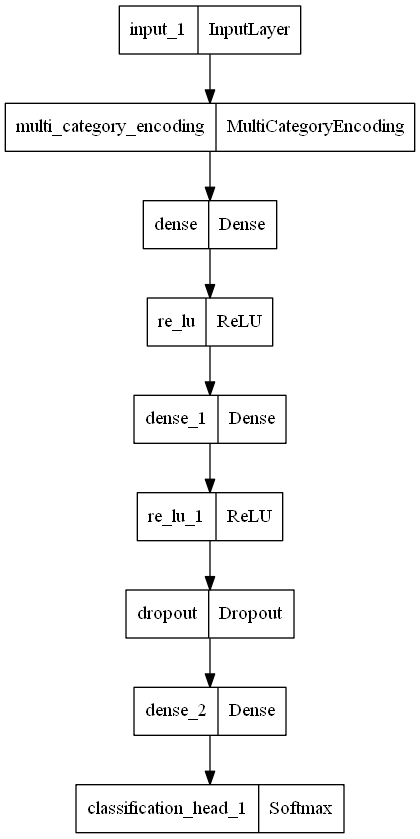

In [14]:
tf.keras.utils.plot_model(best_model, to_file=f'{output_filename}_plot.png')

In [15]:
best_model.save(f'{output_filename}')

INFO:tensorflow:Assets written to: model-autokeras-am-filtered_by_label\assets


In [16]:
print(f"Execution finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Execution finished at 2022-03-10 02:40:28.
